# Least Squares From Scratch

- Linear Classifier.
- Discriminative model.

### Error Function:
$$ E_D(\mathbf{\tilde w}) = \frac{1}{2} \sum_{i=1}^n (\mathbf{\tilde w} \mathbf{\tilde x}_i - t_i)^2 $$
where
$$ \mathbf{\tilde x} = [\mathbf{x}, 1] $$
and
$$ \mathbf{\tilde w} = [\mathbf{w}, w_0] $$

### Weight vector:
To find $\mathbf{\tilde w}$ such that error $E_D$ is minimum, take derivative with respect to $\mathbf{\tilde w}$ and equate with zero.
<br>
<br>
Then $\mathbf{\tilde w}$ will be:
$$ \mathbf{\tilde w} = (\mathbf{\tilde X}^T \mathbf{\tilde X})^{-1} \mathbf{\tilde X}^T \mathbf{t} $$

### Referrence
*Pattern Recognition and Machine Learning, Christopher M. Bishop, Springer, 2006*

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class least_squares:

    def __activation_func(self, g):
        return np.array([1 if i == True else -1 for i in g > 0])
    
    def predict(self, X):
        if (hasattr(self, 'W_telda')):
            X_telda = np.hstack((X, np.ones((len(X), 1))))
            g = X_telda@self.W_telda
            a = self.__activation_func(g)
            return a
        else:
            print('Please run fit in order to be able to use predict')
            
    def accuracy(self, y_actual, y_predicted):
        return np.mean(y_actual == y_predicted) * 100
    
    def __scatter_plot(self, X, t):
        color_cond=['blue' if i==1 else 'green' for i in t]
        plt.scatter(np.array(X[:,0]), np.array(X[:,1]), color=color_cond)        

        slope = -(self.W_telda[0] / self.W_telda[1])
        intercept = -(self.W_telda[2] / self.W_telda[1])

        ax = plt.gca()
        ax.autoscale(False)
        x_vals = np.array(ax.get_xlim())
        y_vals = intercept + (slope * x_vals)
        plt.plot(x_vals, y_vals);

        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Data(X1, X2)')
        plt.show()

    def plot_data(self, X, t):
        if ( hasattr(self, 'W_telda')):
            if (len(self.X[0]) == 2):
                self.__scatter_plot(X, t)
            else:
                print('The scatter plot is only available when the data has only 2 features')
        else:
            print('Please run fit in order to be able to plot the Data')

    def fit(self, X, t):
        self.X = X
        self.t = t
        self.X_telda = np.hstack((X, np.ones((len(X), 1))))
        
        self.W_telda = np.linalg.pinv(self.X_telda.T @ self.X_telda) @ self.X_telda.T @ self.t

# Dataset 1

### About Data:
    Data with outliers to check the effect of outliers.

### Training

In [3]:
Data1 = np.genfromtxt('Data1.txt')
# Data1 = Data1[Data1[:,0] < 40] # Without outliers
X1 = Data1[:, 0:2]
t1 = Data1[:, 2]

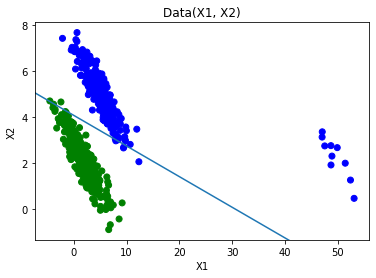

In [4]:
least_squares1 = least_squares()
least_squares1.fit(X1, t1)
least_squares1.plot_data(X1, t1)

### Testing

Accuracy 100.0 %


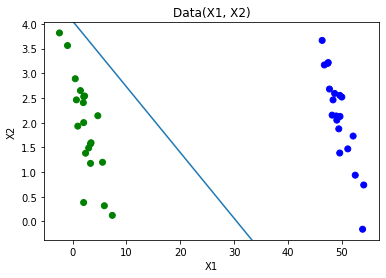

In [5]:
Data1_test = np.genfromtxt('Test1.txt')
X1_test = Data1_test[:, :2]
y1_actual = Data1_test[:, 2]
y1_predicted = least_squares1.predict(X1_test)
acc1 = least_squares1.accuracy(y1_actual, y1_predicted)
print('Accuracy', acc1, '%')
least_squares1.plot_data(X1_test, y1_actual)

# Dataset 2

### Training

In [6]:
Data2 = np.genfromtxt('synth.tr.csv', delimiter=',', skip_header=True)
X2 = Data2[:, 1:3]
t2 = np.array([1 if i > 0 else -1 for i in Data2[:, 3]])

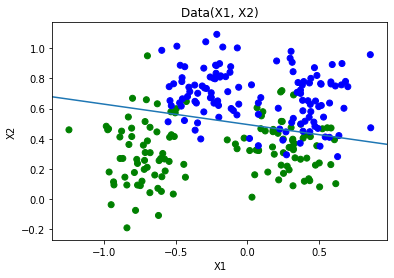

In [7]:
least_squares2 = least_squares()
least_squares2.fit(X2, t2)
least_squares2.plot_data(X2, t2)

### Testing

Accuracy 89.2 %


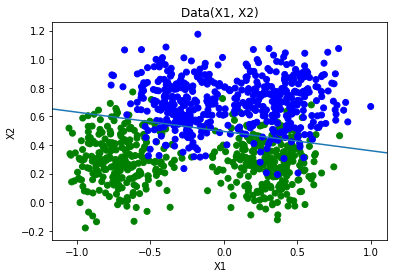

In [8]:
Data2_test = np.genfromtxt('synth.te.csv', delimiter=',', skip_header=True)
X2_test = Data2_test[:, 1:3]
y2_actual = np.array([1 if i > 0 else -1 for i in Data2_test[:, 3]])
y2_predicted = least_squares2.predict(X2_test)
acc2 = least_squares2.accuracy(y2_actual, y2_predicted)
print('Accuracy', acc2, '%')
least_squares2.plot_data(X2_test, y2_actual)

# Dataset 3

### Training

In [9]:
from sklearn.datasets import make_classification


In [10]:
X3, t3 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1)
t3 = np.array([1 if i > 0 else -1 for i in t3])

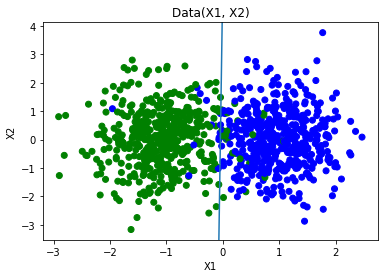

In [11]:
least_squares3 = least_squares()
least_squares3.fit(X3, t3)
least_squares3.plot_data(X3, t3)

### Testing

Accuracy 98.66666666666667 %


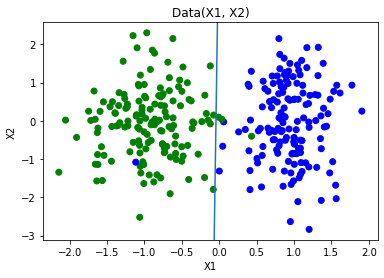

In [12]:
X3_test, y3_actual = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1)
y3_actual = np.array([1 if i > 0 else -1 for i in y3_actual])
y3_predicted = least_squares3.predict(X3_test)
acc3 = least_squares3.accuracy(y3_actual, y3_predicted)
print('Accuracy', acc3, '%')
least_squares3.plot_data(X3_test, y3_actual)